### Processing Data through SQL

We don't need much of the business details as we are only interested in the number of businesses per type. So we will just take a business' legal name, the community they are in, the earliest date of license start, and the latest date of license term end

In [1]:
small_name_commumity = _deepnote_execute_sql('SELECT LEGAL_NAME, Com_Name, MIN(LICENSE_TERM_START_DATE) AS start, MAX(LICENSE_TERM_EXPIRATION_DATE) AS end\nFROM \'/work/Business Info By Size/SmallBusinessInfo.csv\'\nWHERE Com_Name != \'[]\'\nGROUP BY LEGAL_NAME, Com_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
small_name_commumity

,LEGAL_NAME,Com_Name,start,end
0,JYM INVESTMENTS LLC,['WEST RIDGE'],2020-12-17,2023-01-15
1,ELIAS A. KANELLOPOULOS,['NEAR NORTH SIDE'],2008-04-14,2023-03-15
2,Silverwolf Productions LLC,['LINCOLN PARK'],2022-05-11,2024-05-15
3,MOVING UNITS INC.,['ALBANY PARK'],2021-11-17,2024-06-15
4,DANIELLE TO,['BRIDGEPORT'],2022-05-11,2023-10-15
...,...,...,...,...
81550,MARIA ALEJANDRA ARIAS ALCANTAR,['CHICAGO LAWN'],2017-04-07,2019-04-15
81551,Ezza Nails - 26 S Halsted LLC,['NEAR WEST SIDE'],2019-11-01,2021-11-15
81552,AMEPOL INC.,['DUNNING'],2022-10-28,2024-11-15
81553,UNIQUEPRINTZ69 L.L.C.,['CHICAGO LAWN'],2021-11-16,2023-12-15


In [2]:
medium_name_commumity = _deepnote_execute_sql('SELECT LEGAL_NAME, Com_Name, MIN(LICENSE_TERM_START_DATE) AS start, MAX(LICENSE_TERM_EXPIRATION_DATE) AS end\nFROM \'/work/Business Info By Size/MediumBusinessInfo.csv\'\nWHERE Com_Name != \'[]\'\nGROUP BY LEGAL_NAME, Com_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
medium_name_commumity

,LEGAL_NAME,Com_Name,start,end
0,LINCOLN SQUARE RAVENSWOOD CHAMBER OF COMMERCE,['LINCOLN SQUARE'],2012-09-20,2023-02-26
1,"THE WOODLAWN TAP, INC.",['HYDE PARK'],2002-05-16,2024-06-15
2,"S&W CHICAGO, L.L.C.",['NEAR NORTH SIDE'],2002-05-16,2024-05-15
3,SAI KRIPA IN CHICAGO INC.,['WEST TOWN'],2007-03-27,2024-11-15
4,BRIGHT HORIZONS CHILDREN'S CENTERS LLC,['HYDE PARK'],2013-03-28,2024-08-15
...,...,...,...,...
6988,CAROLINA'S SILVER INCORPORATED,['LOOP'],2000-08-16,2001-08-14
6989,"BEAT KITCHEN, INC.",['SOUTH LAWNDALE'],2013-08-09,2013-08-11
6990,THE EASTMAN EGG COMPANY LLC,['NEAR WEST SIDE'],2013-05-09,2017-05-15
6991,"LESLIE HINDMAN AUCTIONEERS, INC.",['NEAR NORTH SIDE'],2001-08-16,2002-08-15


In [3]:
big_name_commumity = _deepnote_execute_sql('SELECT LEGAL_NAME, Com_Name, MIN(LICENSE_TERM_START_DATE) AS start, MAX(LICENSE_TERM_EXPIRATION_DATE) AS end\nFROM \'/work/Business Info By Size/BigBusinessInfo.csv\'\nWHERE Com_Name != \'[]\'\nGROUP BY LEGAL_NAME, Com_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
big_name_commumity

,LEGAL_NAME,Com_Name,start,end
0,GRAHAM ENTERPRISE INC,['NEAR NORTH SIDE'],2010-04-08,2024-06-15
1,"NAIL JUNKIE ROSCOE, INC.",['NORTH CENTER'],2016-07-12,2022-07-15
2,HYATT CORPORATION,['LOOP'],2002-05-16,2024-09-15
3,"DINEAMIC STEAK, LLC",['LOOP'],2015-03-23,2025-04-15
4,"HORNBLOWER CRUISES AND EVENTS, LLC",['NEAR NORTH SIDE'],2001-08-16,2025-03-15
...,...,...,...,...
13879,YURIANA SANCHEZ-SALAZAR,['GAGE PARK'],2016-10-28,2018-11-15
13880,"Tranquil Accessories, LLC",['AUBURN GRESHAM'],2020-08-05,2022-08-15
13881,NOVIBEL ENTERPRISE LLC,['WEST RIDGE'],2022-05-03,2024-05-15
13882,CRISTINA TARRIBA VILLA,['WEST TOWN'],2022-09-12,2024-09-15


### Import data about TIF Districts and the businesses they contain

In [4]:
small_businesses = _deepnote_execute_sql('SELECT *\nFROM \'/work/Business_Info_With_TIF_Info/small_businesses.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
small_businesses

,name,approval_d,LEGAL_NAME,start,end
0,Kinzie Industrial Conservation Area,1998-06-10,LEOPARDO COMPANIES INC.,2006-05-11,2022-09-15
1,35th/Halsted,1997-01-14,DOMONANT MEDIA LLC,2022-08-08,2024-08-15
2,Northwest Industrial Corridor,1998-12-02,PRIMERA IRON WORKS CORP.,2010-09-03,2024-09-15
3,Fullerton/Milwaukee,2000-02-16,FLYING SQUIRREL INDUSTRIES LLC,2014-05-08,2024-05-15
4,Armitage/Pulaski,2007-06-13,ELVIRA TECALERO DEGANTE,2019-09-13,2023-09-15
...,...,...,...,...,...
72298,Red Line Extension (RLE),2022-12-14,LEAD RESCUE NFP,2017-11-29,2019-12-15
72299,Roseland/Michigan Avenue,2002-01-16,OM AND REYAN LLC,2023-01-17,2025-02-15
72300,Roseland/Michigan Avenue,2002-01-16,T & C WELDER SERVICE LLC,2023-02-15,2025-03-15
72301,Touhy/Western,2006-09-13,"HAUS FINANCIAL SERVICES, LLC",2010-02-01,2011-10-15


In [5]:
medium_businesses = _deepnote_execute_sql('SELECT *\nFROM \'/work/Business_Info_With_TIF_Info/medium_businesses.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
medium_businesses

,name,approval_d,LEGAL_NAME,start,end
0,Wilson Yard,2001-06-27,"1021 MONTROSE, L.L.C.",2005-05-13,2024-06-15
1,Red and Purple Modernization Phase One Project,2016-11-30,BRIGHT HORIZONS CHILDREN'S CENTERS LLC,2014-05-13,2024-08-15
2,Red Line Extension (RLE),2022-12-14,"COMPASS GROUP USA, INC.",2001-11-16,2024-04-15
3,Red and Purple Modernization Phase One Project,2016-11-30,"FOXTROT VENTURES, INCORPORATED",2016-12-16,2024-12-15
4,Midwest,2000-05-17,FOUR A'S FOOD INC,2002-11-22,2022-09-15
...,...,...,...,...,...
7243,Touhy/Western,2006-09-13,EFRAIN VELAZQUEZ,2015-07-31,2019-08-15
7244,71st & Stony Island,1998-10-07,FAMILY FOCUS,2019-08-26,2024-06-15
7245,71st & Stony Island,1998-10-07,MARTIN & MICHAEL EISERMAN,2001-11-16,2021-07-15
7246,71st & Stony Island,1998-10-07,LEITELT BROTHERS,2002-11-16,2024-10-15


In [6]:
big_businesses = _deepnote_execute_sql('SELECT *\nFROM \'/work/Business_Info_With_TIF_Info/big_businesses.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
big_businesses

,name,approval_d,LEGAL_NAME,start,end
0,Red and Purple Modernization Phase One Project,2016-11-30,"CHICAGO CUBS BASEBALL CLUB, LLC",2010-03-16,2024-06-15
1,Red and Purple Modernization Phase One Project,2016-11-30,GRAHAM ENTERPRISE INC,2009-04-21,2024-06-15
2,Archer/Western,2009-02-11,A&J MUFFLERS AND BRAKES CORP.,2013-06-12,2025-06-15
3,Western Avenue North,2000-01-12,"STANLEY BROWN JEWELIST, LTD.",2002-11-16,2025-09-15
4,47th/Ashland,2002-03-27,CACAOABUNGA LLC,2022-01-13,2024-01-15
...,...,...,...,...,...
14143,71st & Stony Island,1998-10-07,"UJAMAA CONSTRUCTION, INC.",2012-07-13,2024-07-15
14144,71st & Stony Island,1998-10-07,NATASHA N. ABBEY,2005-07-27,2024-10-15
14145,71st & Stony Island,1998-10-07,WHITE CASTLE SYSTEM INC,2002-08-16,2024-06-15
14146,Touhy/Western,2006-09-13,WESTERN 5233 CORPORATION,2015-03-05,2025-03-15


### Import all the required libraries to create visualizations in Python

In [7]:
!pip install geopy
!pip install geopandas
!pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
import json
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import json


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Import which Community Areas each TIF District intersects with

In [8]:
with open('/work/intersections.json', 'r') as file:
    intersections_data = json.load(file)

intersections_data['Roosevelt/Clark']

['NEAR WEST SIDE', 'NEAR SOUTH SIDE', 'ARMOUR SQUARE', 'LOOP']

### Visualize the performance inside of the TIF

/tmp/ipykernel_82/1872488870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallDf.loc[:, 'start_year'] = smallDf['start'].dt.year
/tmp/ipykernel_82/1872488870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallDf.loc[:, 'end_year'] = smallDf['end'].dt.year
/tmp/ipykernel_82/1872488870.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

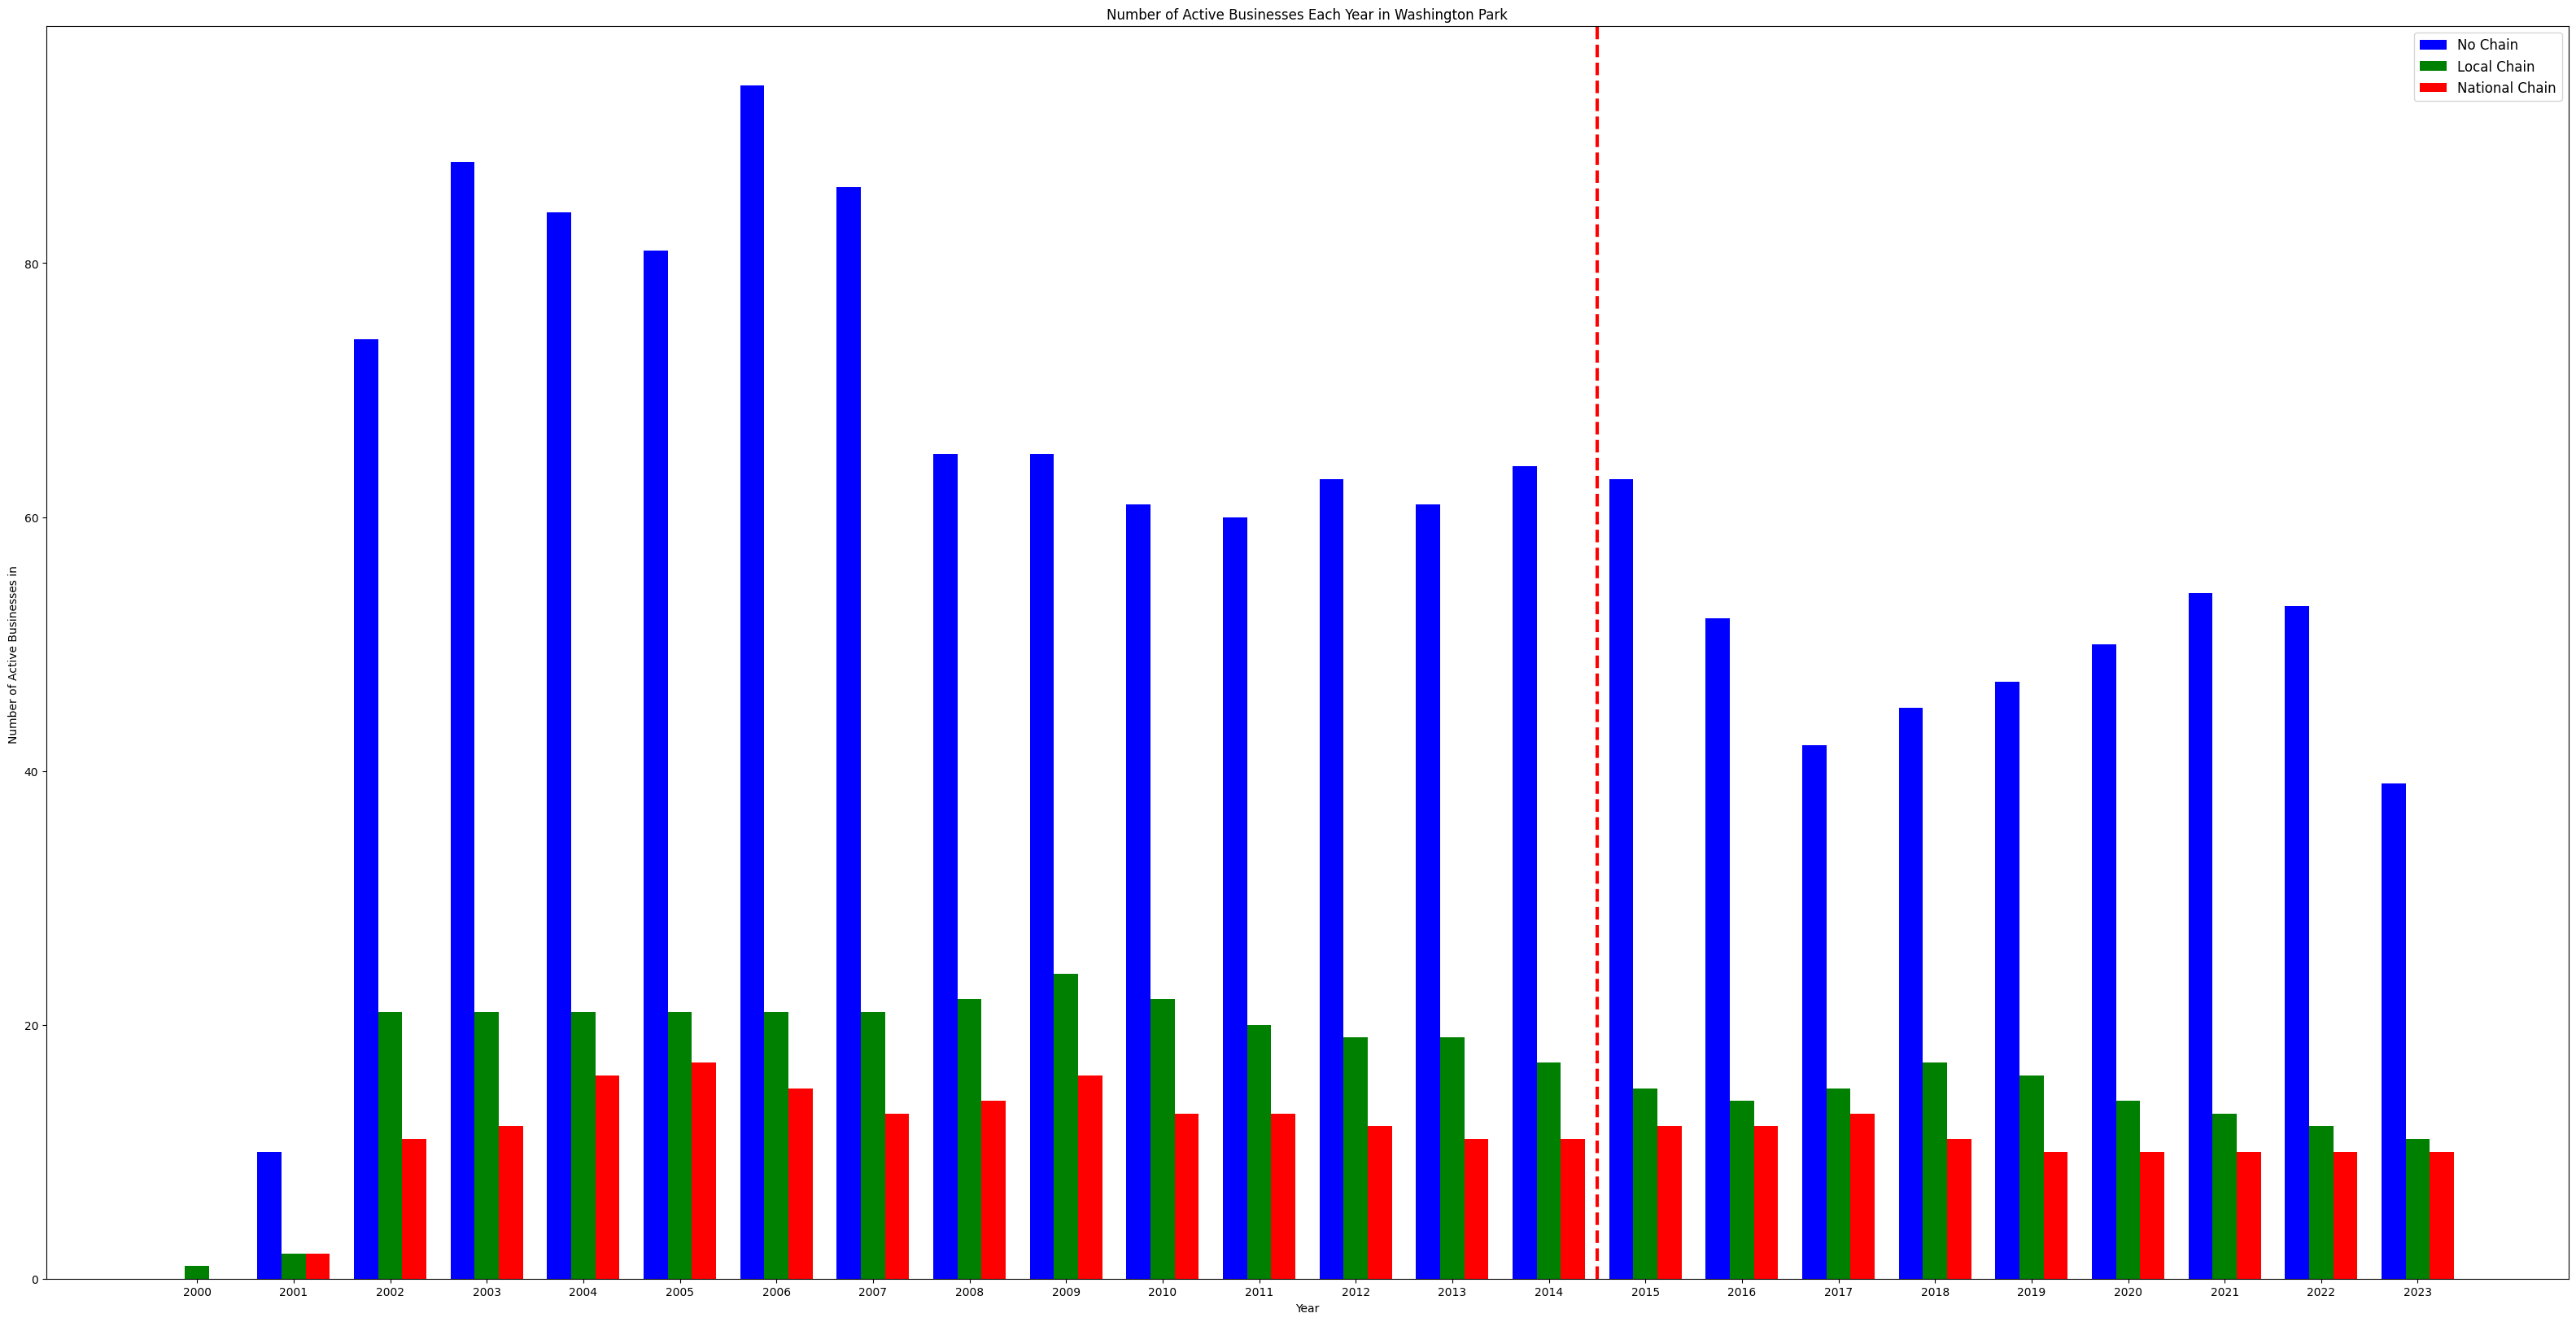

In [11]:
def plot_active_businesses_by_year_near_tif(tif_name, colors=)


def plot_active_businesses_by_year_by_tif(tif_name, colors=['blue', 'green', 'red'], smallOriginalDf=small_businesses, mediumOriginalDf=medium_businesses, bigOriginalDf=big_businesses):
    

    # process the earliest start and latest end year for small businesses
    smallDf = smallOriginalDf[smallOriginalDf['name'] == tif_name]
    smallDf.loc[:, 'start_year'] = smallDf['start'].dt.year
    smallDf.loc[:, 'end_year'] = smallDf['end'].dt.year
    earliest_small_year = smallDf['start_year'].min()

    # process the earliest start and latest end year for medium businesses
    mediumDf = mediumOriginalDf[mediumOriginalDf['name'] == tif_name]
    mediumDf.loc[:, 'start_year'] = mediumDf['start'].dt.year
    mediumDf.loc[:, 'end_year'] = mediumDf['end'].dt.year
    earliest_medium_year = mediumDf['start_year'].min()

    # process the earliest start and latest end year for big businesses
    bigDf = bigOriginalDf[bigOriginalDf['name'] == tif_name]
    bigDf.loc[:, 'start_year'] = bigDf['start'].dt.year
    bigDf.loc[:, 'end_year'] = bigDf['end'].dt.year
    earliest_big_year = bigDf['start_year'].min()
    
    
    tif_approval_date = smallDf['approval_d'].iloc[0].year

    years = range(int(min(earliest_small_year, earliest_medium_year, earliest_big_year)), 2024, 1)

    small_business_active_counts = []
    medium_business_active_counts = []
    big_business_active_counts = []

    for year in years:
        small_business_active_counts.append(((smallDf['start_year'] <= year) & (smallDf['end_year'] >= year)).sum())
        medium_business_active_counts.append(((mediumDf['start_year'] <= year) & (mediumDf['end_year'] >= year)).sum())
        big_business_active_counts.append(((bigDf['start_year'] <= year) & (bigDf['end_year'] >= year)).sum())

    print("------------------------")
    print(small_business_active_counts)
    print(medium_business_active_counts)
    print(big_business_active_counts)

    print("------------------------")

    fig, ax = plt.subplots(figsize=(40, 20))
    bar_width = 0.25

    # Adjust the positions for each category
    years_shifted = np.arange(len(years))
    years_shifted_small = years_shifted - bar_width
    years_shifted_medium = years_shifted
    years_shifted_big = years_shifted + bar_width

    # Plotting the bars
    plt.bar(years_shifted_small, small_business_active_counts, width=bar_width, color=colors[0], label='No Chain')
    plt.bar(years_shifted_medium, medium_business_active_counts, width=bar_width, color=colors[1], label='Local Chain')
    plt.bar(years_shifted_big, big_business_active_counts, width=bar_width, color=colors[2], label='National Chain')

    # Additional plot settings
    if tif_approval_date in list(years):
        plt.axvline(x=list(years).index(tif_approval_date) + .5, color='red', linestyle='--', linewidth=3.0)  # Just as an example, adjust as needed
    plt.xlabel('Year')
    plt.ylabel('Number of Active Businesses in ')
    plt.title('Number of Active Businesses Each Year in ' + tif_name)
    plt.xticks(years_shifted, years)
    plt.legend(fontsize='large')
    plt.show()
    
    # todo copy this function call it for the community data you have already imported at the head of the file and change stuff in it
    



plot_active_businesses_by_year_by_tif('Washington Park')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>